# Optimización de los gastos de marketing

Esta tarea se realizará para ayudar a optimizar los gastos de marketing de **Y.Afisha**. El departamento análitico recibió los siguientes datos:
- registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
- archivo de volcado con todos los pedidos del período;
- estadísticas de gastos de marketing.

En este notebook investigaremos los siguientes puntos:
- cómo la gente usa el producto;
- cuándo empiezan a comprar;
- cuánto dinero trae cada cliente;
- cuándo pagan.

Para realizar esto, dividiremos el proyecto en tres punto:
1. Descargaremos los datos y los vamos a preparar para el análisis

2. Haremos informes y cálculos de métricas de:

    a. Producto:
        ¿Cuántas personas lo usan cada día, semana y mes?
        ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
        ¿Cuál es la duración de cada sesión?
        ¿Con qué frecuencia los usuarios y las usuarias regresan?
    b. Ventas:
        ¿Cuándo la gente empieza a comprar? 
        ¿Cuántos pedidos hacen durante un período de tiempo dado?
        ¿Cuál es el tamaño promedio de compra?
        ¿Cuánto dinero traen?
    c. Marketing:
        ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)
        ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
        ¿Cuán rentables eran las inversiones?
        
3. Conclusión: aconsejaremos a los expertos de marketing cuánto dinero invertir y dónde

# Contenido <a id='back'></a>

* [1 Inicialización](#inicio)
    * [1.1 Cargar datos](#carga_datos)
    * [1.2 Explorar datos iniciales](#explorar_datos)
        * [1.2.1 Tabla visits](#explorar_datos_visits)
        * [1.2.2 Tabla orders](#explorar_datos_orders)
        * [1.2.3 Tabla costs](#explorar_datos_costs)
* [2 Analisis de datos](#analisis_datos)
    * [2.1 Producto](#explorar_producto)
        * [2.1.1 ¿Cuántas personas lo usan cada día, semana y mes?](#producto_01)
        * [2.1.2 ¿Cuántas sesiones hay por día?](#producto_02)
        * [2.1.3 ¿Cuál es la duración de cada sesión?](#producto_03)
        * [2.1.4 ¿Con qué frecuencia los usuarios y las usuarias regresan?](#producto_04)
        * [2.1.5 Conclusión](#producto_05)
    * [2.2 Ventas](#explorar_ventas)
        * [2.2.1 ¿Cuándo la gente empieza a comprar?](#ventas_01)
        * [2.2.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?](#ventas_02)
        * [2.2.3 ¿Cuál es el tamaño promedio de compra?](#ventas_03)
        * [2.2.4 ¿Cuánto dinero traen?](#ventas_04)
    * [2.3 Marketing](#explorar_marketing)
        * [2.3.1 ¿Cuánto dinero se gastó?](#marketing_01)
        * [2.3.2 ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?](#marketing_02)
        * [2.3.3 ¿Cuán rentables eran las inversiones?](#marketing_03)
* [4 Conclusión General](#conclusion)

## Inicialización <a id='inicio'></a>

Con el fin de resolver nuestras dudas cargaremos las siguientes librerías:
- Pandas
- Matplotlib
- Seaborn
- numpy
- scipy.stats

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

### Cargas de datos: <a id='carga_datos'></a>

Recibimos los siguientes archivos que vamos a obtimizar y luego cargaremos:
- visits_log_us.csv
- orders_log_us.csv
- costs_us.csv

In [108]:
visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    dtype={'Device':'category'},
    parse_dates=['End Ts','Start Ts'],
)

El archivo *visits_log_us.csv* inicial pesaba 79.3 MB, se realizó la obtimización cambiando los tipos de las columnas. *Device* pasó a tipo category y las columnas con fecha se cambiaron a datetime64. Con estos cambios se logró reducir el peso a 11.3 MB.

In [109]:
orders = pd.read_csv(
    '/datasets/orders_log_us.csv',
    parse_dates=['Buy Ts'],
)

El archivo *orders_log_us.csv* inicial pesaba 4.4 MB, se realizó la obtimización cambiando la columna *Buy Ts* a datetime64. El peso actual es de 1.2 MB.

In [110]:
costs = pd.read_csv(
    '/datasets/costs_us.csv',
    parse_dates=['dt'],
)

El archivo *costs_us.csv* inicial pesaba 206.2 KB, se realizó la obtimización cambiando la columna *dt* a datetime64. El peso actual es de 59.7 KB.

### Explorar datos iniciales <a id='explorar_datos'></a>

#### Tabla visits <a id='explorar_datos_visits'></a>

La tabla *visits* contiene registros del servidor con datos sobre las visitas al sitio web:
- Uid: identificador único del usuario;
- Device: dispositivo del usuario;
- Start Ts: fecha y hora de inicio de la sesión;
- End Ts: fecha y hora de término de la sesión;
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

In [111]:
print('Presentación de las columnas de visits:')
print(visits.columns)
print()
print('Revisión del número de líneas de visits:')
print(len(visits), 'líneas.')

Presentación de las columnas de visits:
Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

Revisión del número de líneas de visits:
359400 líneas.


In [112]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [113]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid'] 

In [114]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [115]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


La tabla *visits* consta de 5 columnas y 359400 líneas. Los nombres de las columnas se corrigieron para que no haya espacios y que todo este en minusculas. La tabla no tiene valores ausentes. Los tipos de datos se cargaron corregidos y están correctos.

#### Tabla orders <a id='explorar_datos_orders'></a>

La tabla *orders* contiene los datos sobre pedidos:
- Uid: identificador único del usuario que realiza un pedido;
- Buy Ts: fecha y hora del pedido;
- Revenue: ingresos de Y.Afisha de este pedido.

In [116]:
print('Presentación de las columnas de orders:')
print(orders.columns)
print()
print('Revisión del número de líneas de orders:')
print(len(orders), 'líneas.')

Presentación de las columnas de orders:
Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

Revisión del número de líneas de orders:
50415 líneas.


In [117]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [118]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [119]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


La tabla *orders* consta de 3 columnas y 50415 líneas.  Los nombres de las columnas se corrigieron para que no haya espacios y que todo este en minusculas. La tabla no tiene valores ausentes. Los tipos de datos se cargaron corregidos y están correctos.

#### Tabla costs <a id='explorar_datos_costs'></a>

La tabla costs contiene los datos sobre gastos de marketing:
- source_id: identificador de la fuente de anuncios
- dt: fecha;
- costs: gastos en esta fuente de anuncios en este día.

In [120]:
print('Presentación de las columnas de costs:')
print(costs.columns)
print()
print('Revisión del número de líneas de costs:')
print(len(costs), 'líneas.')

Presentación de las columnas de costs:
Index(['source_id', 'dt', 'costs'], dtype='object')

Revisión del número de líneas de costs:
2542 líneas.


In [121]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [122]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


La tabla *costs* consta de 3 columnas y 2542 líneas. Los nombres de las columnas son correctos y la tabla no tiene valores ausentes. Los tipos de datos se cargaron corregidos y están correctos.

## Analisis de datos <a id='analisis_datos'></a>

En este apartado vamos a sacar métricas e informes de productos, ventas y marketing. Especificaremos en cada sección los puntos a que revisaremos.

### Producto <a id='explorar_producto'></a>

En esta sección intentaremos responder a las siguientes preguntas:
- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios y las usuarias regresan?

Para poder responder estas preguntas lo primero que haremos es crear columnas separadas para los valores de año, mes, semana y fecha.

In [123]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

In [124]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27


Con estas columnas creadas ya podemos responder a nuestra primera pregunta.

#### ¿Cuántas personas lo usan cada día, semana y mes? <a id='producto_01'></a>

Para responder a esta pregunta calcularemos las siguientes métricas:
-   **DAU**: el número de usuarios activos diarios (únicos)
-   **WAU**: el número de usuarios activos semanales
-   **MAU**: el número de usuarios activos mensuales

In [125]:
dau = visits.groupby(['session_date']).agg({'uid':'nunique'})
dau.columns=['user_numbers']
dau.describe()

,user_numbers
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


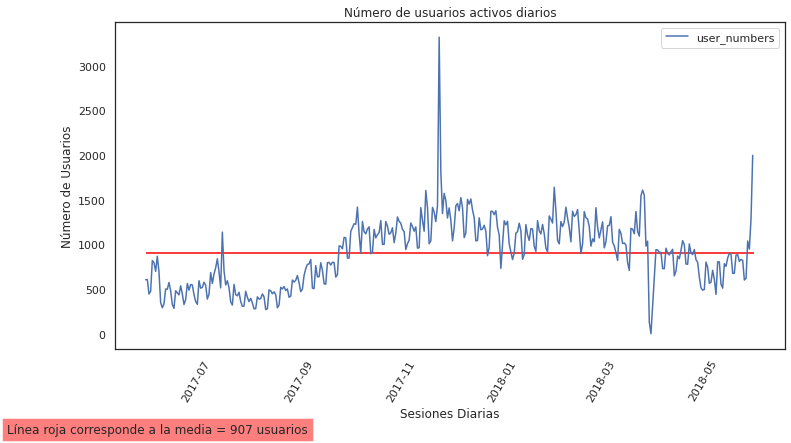

In [126]:
dau.plot(figsize=(12,6))
plt.xlabel('Sesiones Diarias')
plt.xticks(rotation=60)
plt.ylabel('Número de Usuarios')
plt.title('Número de usuarios activos diarios')
plt.hlines(y=[dau.mean()], xmin='2017-06', xmax='2018-06', color='red')
plt.figtext(0.0, -0.07, "Línea roja corresponde a la media = 907 usuarios", ha="left", fontsize=12, bbox={"facecolor": "red", "alpha": 0.5, "pad": 5})
plt.show(block=False)

In [127]:
print(dau.query('user_numbers == 3319'))
print(dau.query('user_numbers == 1'))

              user_numbers
session_date              
2017-11-24            3319
              user_numbers
session_date              
2018-03-31               1


In [128]:
print('En promedio, el número de usuarios activos diarios es:', int(dau.mean()), 'personas.')

En promedio, el número de usuarios activos diarios es: 907 personas.


En promedio el número de usuarios diarios corresponde a 907 personas. Valdría la pena revisar que pasó el día 24 de noviembre 2017 ya que hubo un número muy por encima de la media (3.319 personas conectadas), también habría que revisar que pasó el día 31 de marzo 2018 ya que solo hubo una persona conectada. 

In [129]:
wau = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'})
wau.columns=['user_numbers']
wau.describe()

,user_numbers
count,54.000000
mean,5621.703704
std,2098.487988
min,1997.000000
25%,3686.250000
50%,5599.500000
75%,7424.500000
max,10716.000000


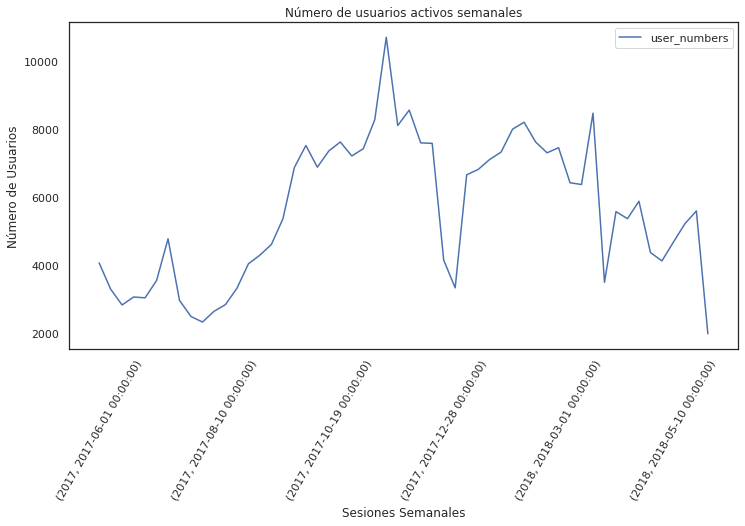

In [130]:
wau.plot(figsize=(12,6))
plt.xlabel('Sesiones Semanales')
plt.xticks(rotation=60)
plt.ylabel('Número de Usuarios')
plt.title('Número de usuarios activos semanales')
plt.show(block=False)

In [131]:
print(wau.query('user_numbers == 10716'))

                           user_numbers
session_year session_week              
2017         2017-11-23           10716


In [132]:
print('En promedio, el número de usuarios activos semanales es:', int(wau.mean()), 'personas.')

En promedio, el número de usuarios activos semanales es: 5621 personas.


Notamos que en promedio se conectan 5621 usuarios a la semana. En nuestro gráfico de usuarios activos semanales, podemos notar que al principio es bastante irregular, en la semana 23 del año 2017 (inicios de junio) parte con 4000 usuarios activos, baja por debajo de los 3000, vuelve a subir y a bajar. Los números suben a partir de agosto, y comienzan a regularizarse en septiembre y octubre. En la tercera semana de noviembre, se experimenta la mayor alza de usuarios registrados. Pero encontramos una caida grande en la última semana de diciembre. Las visitas se vuelven a regularizar, y encontramos un pic más pequeño el primero de marzo seguido de una caída similar a la de diciembre.

In [133]:
mau = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'})
mau.columns=['user_numbers']
mau.describe()

,user_numbers
count,12.000000
mean,23228.416667
std,7546.380462
min,11631.000000
25%,17777.000000
50%,24240.500000
75%,28984.750000
max,32797.000000


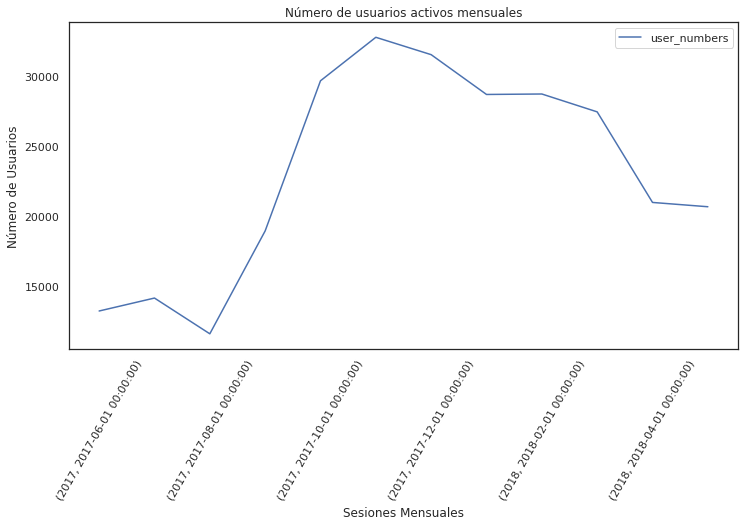

In [134]:
mau.plot(figsize=(12,6))
plt.xlabel('Sesiones Mensuales')
plt.xticks(rotation=60)
plt.ylabel('Número de Usuarios')
plt.title('Número de usuarios activos mensuales')
plt.show(block=False)

In [135]:
print('En promedio, el número de usuarios activos mensuales es:', int(mau.mean()), 'personas.')

En promedio, el número de usuarios activos mensuales es: 23228 personas.


Al ver nuestro gráfico por usuarios activos mensuales, notamos que a partir de agosto 2017 suben los números exponencialmente. A finales de octubre, principios de noviembre llega a su pic, y luego los números comienzan a decrecer gradualmente. En marzo se experimenta una caída grande en las visitas para llegar a abril con números bajos.

#### ¿Cuántas sesiones hay por día? <a id='producto_02'></a>

Para responder a esta pregunta calcularemos el número de sesiones diarias y el número de usuarios diarios, con estos datos podremos encontrar facilmente la cantidad de sesiones diarias por usuarios.

In [136]:
sessions_per_user = visits.groupby(['session_date']).agg({'uid':['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user.head()

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


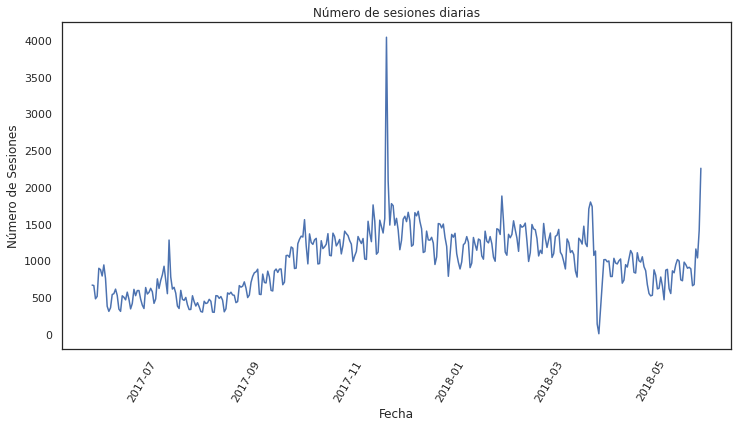

In [137]:
sessions_per_user['n_sessions'].plot(figsize=(12,6))
plt.xlabel('Fecha')
plt.xticks(rotation=60)
plt.ylabel('Número de Sesiones')
plt.title('Número de sesiones diarias')
plt.show(block=False)

In [138]:
print('El promedio de sesiones diarias es de:', int(sessions_per_user['n_sessions'].mean()), 'sesiones.')

El promedio de sesiones diarias es de: 987 sesiones.


Nuestro gráfico de sesiones diarias, es muy similar al primer gráfico presentado de usuarios diarios. Tiene los mismos picos, lo que nos indica que probablemente no hay demasiadas sesiones por usuario. Vamos a comprobar esta hipótesis.

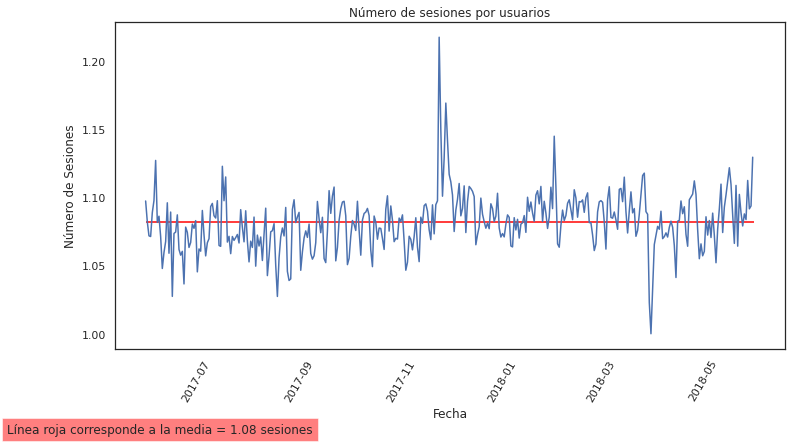

In [139]:
sessions_per_user['sessions_per_user'].plot(figsize=(12,6))
plt.xlabel('Fecha')
plt.xticks(rotation=60)
plt.ylabel('Número de Sesiones')
plt.hlines(y=[sessions_per_user['sessions_per_user'].mean()], xmin='2017-06', xmax='2018-06', color='red')
plt.figtext(0.0, -0.07, "Línea roja corresponde a la media = 1.08 sesiones", ha="left", fontsize=12, bbox={"facecolor": "red", "alpha": 0.5, "pad": 5})
plt.title('Número de sesiones por usuarios')
plt.show(block=False)

In [140]:
print('El promedio de sesiones diarias por usuario es de:', sessions_per_user['sessions_per_user'].mean(), 'sesion al día.')

El promedio de sesiones diarias por usuario es de: 1.082169644003972 sesion al día.


Notamos que el gráfico es bastante parejo, en general los usuarios tienen una sesión diaria. 

#### ¿Cuál es la duración de cada sesión? <a id='producto_03'></a>

Para responder a esta pregunta calcularemos la duración media de la sesión (asl).

In [141]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

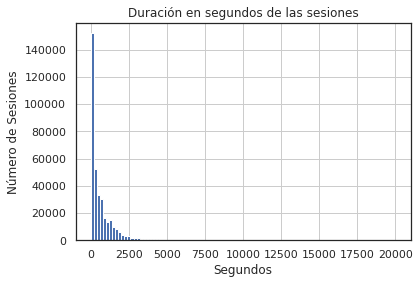

In [142]:
visits['session_duration_sec'].hist(bins=100, range=(0, 20000))
plt.xlabel('Segundos')
plt.ylabel('Número de Sesiones')
plt.title('Duración en segundos de las sesiones')
plt.show(block=False)

Observando nuestro gráfico notamos un problema importante, la distribución está muy desiquilibrada, no podremos sacar la media o mediana ya que nos darían un valor irreal. En este caso calcularemos la moda.

In [143]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

In [144]:
print('Lo normal es que cada visita dure:', visits['session_duration_sec'].mode().values[0], 'segundos.')

Lo normal es que cada visita dure: 60 segundos.


Podemos notar que el promedio de duración es de 644 segundos, la mediana de 300 segundos, pero al analizar el gráfico y ver la moda, notámos que en realidad, lo normal son solo 60 segundos. En este punto, es importante que entender que está pasando. Son demasiados los usuarios que se desconectan de inmediato. 

#### ¿Con qué frecuencia los usuarios y las usuarias regresan? <a id='producto_04'></a>

Para responder a esta pregunta calcularemos el *sticky factor* para la audiencia semanal y mensual. Presentaremos estos resultados porcentualmente.

In [145]:
sticky_wau = (dau.mean() / wau.mean()) * 100
sticky_mau = (dau.mean() / mau.mean()) * 100

In [146]:
print('Para la audiencia semanal el factor de adherencia es', int(sticky_wau), '%')
print('Para la audiencia mensual el factor de adherencia es', int(sticky_mau), '%')

Para la audiencia semanal el factor de adherencia es 16 %
Para la audiencia mensual el factor de adherencia es 3 %


Para investigar esto más a fondo crearemos una tabla dinamica que refleje el cambio en la retención por cohorte. Definiremos nuestros cohortes por meses. Utilizaremos la tabla 'visits' limpia para realizar este estudio, la llamaremos cohorts_visits.

In [147]:
cohorts_visits = visits[['device','end_ts','source_id','start_ts','uid']]

Lo primero que haremos es buscar los cohortes basados en la primera actividad del usuario y los uniremos a nuestra tabla 'cohorts_visits':

In [148]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
cohorts_visits = cohorts_visits.join(first_activity_date, on='uid')
cohorts_visits.head()

,device,end_ts,source_id,start_ts,uid,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00


Crearemos entonces la columna 'cohort_lifetime' que corresponderá a la semana de la session menos la primera session. Esto nos dará el número de semanas en que el usuario se encontró activo.

In [149]:
cohorts_visits['session_start_month'] = cohorts_visits['start_ts'].astype('datetime64[M]')
cohorts_visits['first_activity_month'] = cohorts_visits['first_activity_date'].astype('datetime64[M]')

cohorts_visits['cohort_lifetime'] = cohorts_visits['session_start_month'] - cohorts_visits['first_activity_month']

cohorts_visits['cohort_lifetime'] = cohorts_visits['cohort_lifetime'] / np.timedelta64(1, 'M')
cohorts_visits['cohort_lifetime'] = cohorts_visits['cohort_lifetime'].round().astype(int)

In [150]:
cohorts_visits.head()

,device,end_ts,source_id,start_ts,uid,first_activity_date,session_start_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


Simplificaremos nuestra tabla, creado 'cohorts', una tabla que solo tendrá el usuario, los cohortes basados en la primera actividad del mismo y su ciclo de vida. A esta tabla, le agregaremos una columna con el número de usuarios en la 0 semana del ciclo de vida, de esta manera podremos calcular la retención que agregaremos a una nueva columna.

In [151]:
cohorts = (cohorts_visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index())
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohorts_users'})
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohorts_users']

In [152]:
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohorts_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


Ahora podemos crear una tabla dinamica que reflejará el cambio en la retención por cohorte (first_activity_month) dependiendo del ciclo de vida:

In [153]:
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

In [154]:
print(retention_pivot)

cohort_lifetime        0         1         2         3         4         5   \
first_activity_month                                                          
2017-06-01            1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017-07-01            1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08-01            1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09-01            1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017-10-01            1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017-11-01            1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017-12-01            1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018-01-01            1.0  0.059715  0.039339  0.024973  0.020244       NaN   
2018-02-01            1.0  0.057080  0.025454  0.020093       NaN       NaN   
2018-03-01            1.0  0.041818  0.027053       NaN       NaN       NaN   
2018-04-01            1.0  0.048380       NaN       

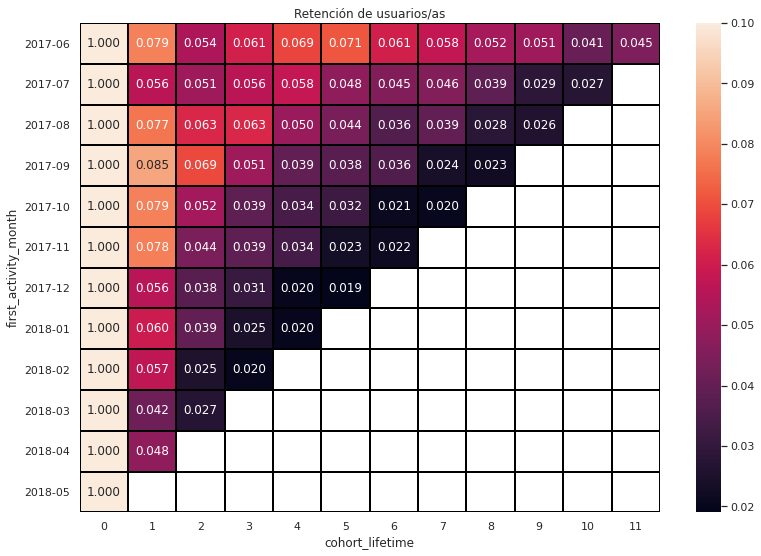

In [155]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Retención de usuarios/as')
sns.heatmap(
    retention_pivot, annot=True, fmt='.3f', linewidths=1, linecolor='black', vmax=0.1, yticklabels=retention_pivot.index.strftime('%Y-%m')
)
plt.show(block=False)

Revisando nuestro mapa de calor, notamos que en junio 2017 tuvimos una retención bastante buena. En la segunda y tercera cohorte hubo un bajón, pero remontó en la cuarta y quinta. Luego comenzó a decender progresivamente. Las siguientes cohortes fueron perdiendo retención progresivamente.En julio 2017 se perdieron más de la mitad de los clientes en el quinto mes, agosto en el cuarto, septiembre en el tercero.

#### Conclusión <a id='producto_05'></a>

En esta sección hemos encontrado que en promedio tenemos 907 usuarios diarios. Valdría la pena revisar los días 24 de noviembre 2017 y el 31 de marzo 2018 ya que fueron los picos con mayor número de usuarios conectados y menor númnero de usuarios conectados respectivamente. Estos dos días fueron muy irregulares con respecto al resto.

El promedio semanal de usuarios es de 5.621, pudimos notar además que la conectividad de los usuarios comienza a aumentar en agosto, y se regularizan por un par de meses hasta experimentar el mayor pic en la tercera semana de noviembre. Pero para la última semana de diciembre se experimentó una caida grande. Las visitas se vuelven a regularizar, y encontramos un pic más pequeño el primero de marzo seguido de una caída similar a la de diciembre.

Al mes tenemos 23.228 usuarios utilizando el producto. En la gráfica de usuarios conectados mensualmente, notamos que a partir de agosto 2017 el número de usuarios conectados sube exponencialmente, A finales de octubre, inicios de noviembre llega a su pic y luego los números comienzan a decrecer gradualmente. En Marzo se experimentó una caída grande para llegar a abril con números bajos.

El promedio de sesiones diarias es 987, lo que equivale a 1.08 sesiones por usuario al día. Podemos notar que el promedio de duración es de 644 segundos, la mediana de 300 segundos, pero al analizar el gráfico y ver la moda, notámos que en realidad, lo normal son solo 60 segundos.

Por otro lado, encontramos que el factor de adherencia semanal es de 16% y el mensual es de 3%. Pero al revisar nuestro mapa de calor, notamos que en junio 2017 tuvimos una retención bastante buena. En la segunda y tercera cohorte hubo un bajón, pero remontó en la cuarta y quinta. Luego comenzó a decender progresivamente. Las siguientes cohortes fueron perdiendo retención progresivamente.En julio 2017 se perdieron más de la mitad de los clientes en el quinto mes, agosto en el cuarto, septiembre en el tercero.

### Ventas <a id='explorar_ventas'></a>

En esta sección intentaremos responder a las siguientes preguntas:
- ¿Cuándo la gente empieza a comprar?
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen?

#### ¿Cuándo la gente empieza a comprar? <a id='ventas_01'></a>

Como tenemos datos de casi un año, trabajaremos con cohortes mensuales. Lo primero que haremos es buscar la fecha de ingreso a la plataforma en la tabla visits:

In [156]:
visits['login_month'] = visits['start_ts'].astype('datetime64[M]')
first_login = visits.groupby('uid').agg({'login_month':'min'}).reset_index()
first_login.columns = ['uid', 'first_login_month']
first_login.head()

,uid,first_login_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


Ahora podemos recuperar el mes de la primera compra de cada cliente:

In [157]:
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'orders_month':'min'}).reset_index()
first_orders.columns = ['uid', 'first_orders_months']
first_orders.head()

,uid,first_orders_months
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [158]:
first_purchase_report = pd.merge(first_login, first_orders, on='uid')
first_purchase_report['age'] = (
    first_purchase_report['first_orders_months'] - first_purchase_report['first_login_month']
) / np.timedelta64(1,'M')
first_purchase_report['age'] = first_purchase_report['age'].round().astype('int')
first_purchase_report.head()

,uid,first_login_month,first_orders_months,age
0,313578113262317,2017-09-01,2018-01-01,4
1,1575281904278712,2017-06-01,2017-06-01,0
2,2429014661409475,2017-10-01,2017-10-01,0
3,2464366381792757,2018-01-01,2018-01-01,0
4,2551852515556206,2017-11-01,2017-11-01,0


In [159]:
first_purchase_report['age'].value_counts(normalize=True)

0     0.823782
1     0.062974
2     0.029598
3     0.022725
4     0.018290
5     0.014046
6     0.010103
7     0.007091
8     0.004956
9     0.003340
10    0.001615
11    0.001479
Name: age, dtype: float64

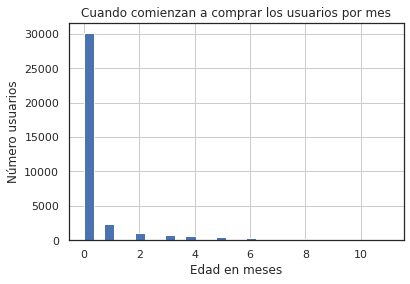

In [160]:
first_purchase_report['age'].hist(bins=30)
plt.xlabel('Edad en meses')
plt.ylabel('Número usuarios')
plt.title('Cuando comienzan a comprar los usuarios por mes')
plt.show(block=False)

Como se puede apreciar la mayoría de los usuarios (el 82% de los usuarios) realizan su compra en el mismo mes en el que ingresaron por primera vez a la plataforma. En este caso será interesante revisar que pasa en ese primer mes en el que acceden los usuarios.

In [161]:
visits['login_day'] = visits['start_ts'].astype('datetime64[D]')
first_login_day = visits.groupby('uid').agg({'login_day':'min'}).reset_index()
first_login_day.columns = ['uid', 'first_login_date']
first_login_day.head()

,uid,first_login_date
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [162]:
orders['orders_day'] = orders['buy_ts'].astype('datetime64[D]')
first_orders_day = orders.groupby('uid').agg({'orders_day':'min'}).reset_index()
first_orders_day.columns = ['uid', 'first_orders_day']
first_orders_day.head()

,uid,first_orders_day
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [163]:
first_purchase_date_report = pd.merge(first_login_day, first_orders_day, on='uid')
first_purchase_date_report['age'] = (
    first_purchase_date_report['first_orders_day'] - first_purchase_date_report['first_login_date']
) / np.timedelta64(1,'D')
first_purchase_date_report['age'] = first_purchase_date_report['age'].round().astype('int')
first_purchase_date_report.head()

,uid,first_login_date,first_orders_day,age
0,313578113262317,2017-09-18,2018-01-03,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-27,2018-01-28,1
4,2551852515556206,2017-11-24,2017-11-24,0


In [164]:
filtered_by_first_month = first_purchase_date_report[(first_purchase_date_report['age'] < 31)]
filtered_by_first_month['age'].value_counts(normalize=True)

0     0.792649
1     0.062237
2     0.021685
3     0.014309
4     0.012219
5     0.009719
6     0.008357
7     0.007503
8     0.006838
9     0.005128
10    0.004274
13    0.003989
14    0.003894
11    0.003830
15    0.003672
21    0.003577
17    0.003071
18    0.003007
20    0.002912
16    0.002881
12    0.002881
22    0.002627
19    0.002627
28    0.002184
23    0.002089
26    0.002058
24    0.002026
27    0.002026
29    0.001963
25    0.001931
30    0.001836
Name: age, dtype: float64

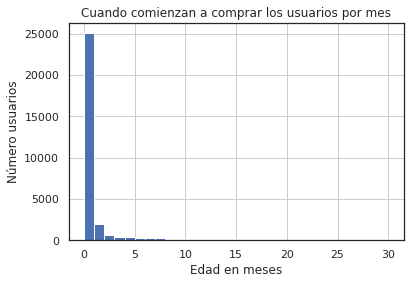

In [165]:
filtered_by_first_month['age'].hist(bins=30)
plt.xlabel('Edad en meses')
plt.ylabel('Número usuarios')
plt.title('Cuando comienzan a comprar los usuarios por mes')
plt.show(block=False)

Comprobamos que los usuarios realizan la comprar en su mayoria (79%) la primera vez que acceden a la plataforma, y en general no pasan más de 4 días para que los indecisos realizen su compra. Esto es el sueño de una companía. Revisemos cuantos pedidos realizan estos usuarios.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado? <a id='ventas_02'></a>

Como ya hemos visto, los usuarios tienen pocas sesiones por días, y en general realizan su primera compra en cuanto entran a la aplicación. Pero la retención es muy baja. Vamos a analizar cuantos pedidos realizan cada usuario al mes.

In [166]:
orders = orders[['buy_ts', 'revenue', 'uid']]
orders['buy_year'] = orders['buy_ts'].dt.year
orders['buy_month'] = orders['buy_ts'].dt.month
purchases_per_user = orders.groupby(['buy_year', 'buy_month']).agg({'uid':['count','nunique']})
purchases_per_user.columns = ['n_sessions', 'n_users']
purchases_per_user['purchase_per_user'] = (
    purchases_per_user['n_sessions'] / purchases_per_user['n_users']
)
purchases_per_user

n_sessions  n_users  purchase_per_user
buy_year buy_month                                        
2017     6                2354     2023           1.163618
         7                2363     1984           1.191028
         8                1807     1472           1.227582
         9                3387     2750           1.231636
         10               5679     4675           1.214759
         11               5659     4547           1.244557
         12               6218     4942           1.258195
2018     1                4721     3898           1.211134
         2                5281     4258           1.240254
         3                5326     4181           1.273858
         4                3273     2744           1.192784
         5                4346     3544           1.226298
         6                   1        1           1.000000

In [167]:
print('El promedio de compras por usuario al mes es de:', purchases_per_user['purchase_per_user'].mean(), 'usuarios.')

El promedio de compras por usuario al mes es de: 1.2058233446244648 usuarios.


#### ¿Cuál es el tamaño promedio de compra? <a id='ventas_03'></a>

Vamos a revisar la columna de revenue para tener una idea de la distribución de los montos vendidos:

In [168]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Podemos notar que el promedio de compra es de 5 dolares, el minimo es 0 y el máximo es de la suma estratosferica de 2633 dolares. Vamos a revisar el promedio de compras mensuales.

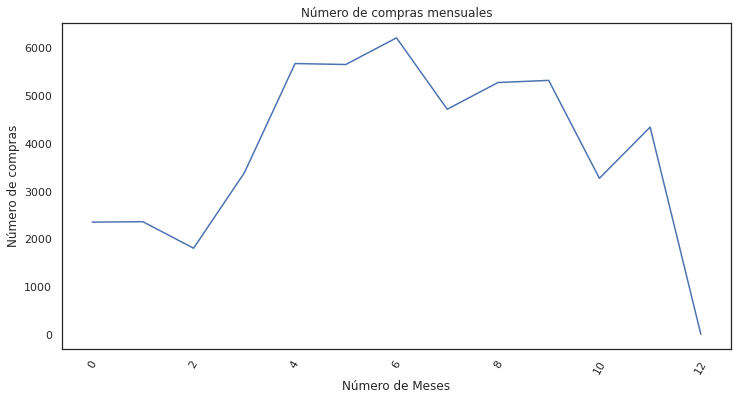

In [169]:
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')
average_purchases = orders.groupby('orders_month').agg({'uid':'count'}).reset_index()
average_purchases.columns = ['orders_month', 'n_orders']
average_purchases['n_orders'].plot(figsize=(12,6))
plt.xlabel('Número de Meses')
plt.xticks(rotation=60)
plt.ylabel('Número de compras')
plt.title('Número de compras mensuales')
plt.show(block=False)

Como se puede apreciar en el gráfico los primeros 3 meses (de junio a agosto) las ordenes mensuales no superaban los 2500. A partir de septiembre comenzaron a aumentar el número de ordenes hasta llegar al pic en diciembre. Sin embargo, las ordenes comenzaron a bajar en 2018 teniendo una caída grande en abril.

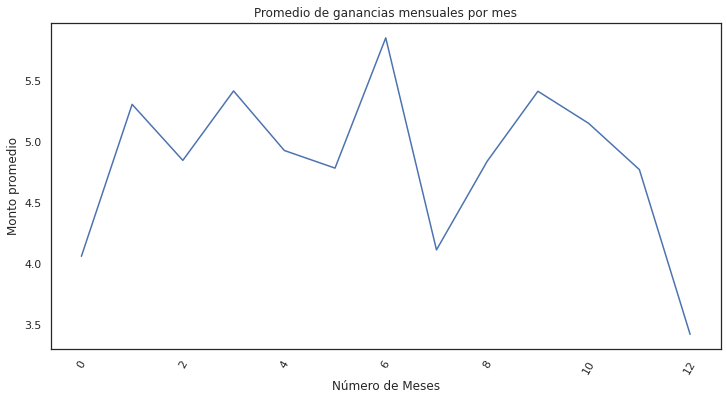

In [170]:
average_orders = orders.groupby('orders_month').agg({'uid':'count', 'revenue':'sum'}).reset_index()
average_orders.columns = ['orders_month', 'n_users', 'total_revenue']
average_orders['average_order_per_month'] = average_orders['total_revenue'] / average_orders['n_users']
average_orders['average_order_per_month'].plot(figsize=(12,6))
plt.xlabel('Número de Meses')
plt.xticks(rotation=60)
plt.ylabel('Monto promedio')
plt.title('Promedio de ganancias mensuales por mes')
plt.show(block=False)

El promedio de gastos por mes varia entre los 4 y justo por debajo de los 6 dolares. El pic es en diciembre, pero hay una caída grande en enero 2018.

#### ¿Cuánto dinero traen? <a id='ventas_04'></a>

Para analizar cuanto dinero entra, lo primero que haremos es confirmar que estamos trabajando en el mismo periodo de tiempo.

In [171]:
orders = orders[['buy_ts', 'revenue', 'uid']]
orders['buy_ts'].describe()

/tmp/ipykernel_26/3900174143.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['buy_ts'].describe()


count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

Para las compras, el periodo es exactamente un año del 01-06-2017 al 01-06-2018.

In [172]:
costs['dt'].describe()

/tmp/ipykernel_26/3241683431.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  costs['dt'].describe()


count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Para los costes la fecha es del 01-06-2017 al 31-05-2018. Tenemos una diferencia de 1 día. Vamos a quitar ese día de la tabla 'orders' para seguir nuestro estudio.

In [173]:
orders = orders.query('buy_ts < "2018-06-01 00:00:00"')
orders['buy_ts'].describe()

/tmp/ipykernel_26/3479710650.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['buy_ts'].describe()


count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

Como anteriormente realizaremos cohortes mensuales ya que tenemos datos de un año completo.

In [174]:
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'orders_month':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Calcularemos el número de clientes mensuales:

In [175]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Agregaremos los meses de la primera compra de los clientes a la tabla 'orders'.

In [176]:
orders_ = pd.merge(orders, first_orders, on = 'uid')
orders_.head()

,buy_ts,revenue,uid,orders_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


Ahora, ya podemos agrupar la tabla 'orders' con el número de clientes mensuales.

In [177]:
cohorts = orders_.groupby(['first_order_month', 'orders_month']).agg({'revenue':'sum'}).reset_index()
cohorts.head()

,first_order_month,orders_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Con esto, hemos logrado crear una tabla que nos indica los ingresos generados en cada cohorte. Por ejemplo, en la fila 0, los clientes que realizaron su primera compra en junio 2017 generaron un ingreso total de $9557.49. Agregaremos a nuestro reporte los datos sobre cuántos usuarios relizaron sus primeras compras en cada mes a la tabla 'cohorts'.

In [178]:
report = pd.merge(cohort_sizes, cohorts, on ='first_order_month')
report.head()

,first_order_month,n_buyers,orders_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Crearemos un margen de beneficio para poder calcular el LTV (Lifetime Value) y agregaremos la edad de cada cohorte para simplificar la lectura de datos más adelante:

In [179]:
margin_rate = 1

In [180]:
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['orders_month'] - report['first_order_month']) / np.timedelta64(1,'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,orders_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


Ahora podremos calcular el LTV simplemente dividiendo la columna 'gp' por el número de compradores, presentaremos el LTV promedio en una tabla:

In [181]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


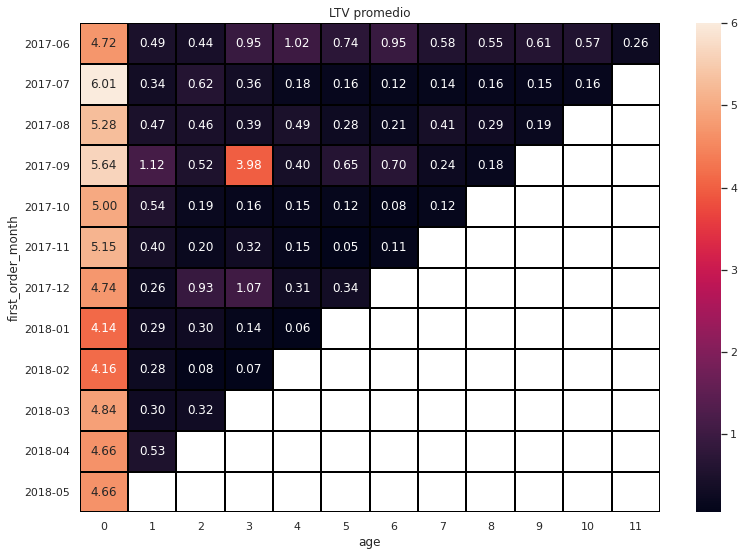

In [182]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('LTV promedio')
sns.heatmap(
    output, annot=True, fmt='.2f', linewidths=1, linecolor='black', vmax=6, yticklabels=output.index.strftime('%Y-%m')
)
plt.show(block=False)

Calculamos el LTV para el cohorte promedio (lo que cuesta en promedio adquirir un cliente).

In [183]:
ltv_201706 = output.loc['2017-06-01'].sum()

print('En promedio, cada cliente de la primera cohorte generó', ltv_201706, 'en ingresos durante su ciclo de vida de un año.')

En promedio, cada cliente de la primera cohorte generó 11.88 en ingresos durante su ciclo de vida de un año.


In [184]:
ltv_201709 = output.loc['2017-09-01'].sum()

print('En promedio, cada cliente de la cuarta cohorte generó', ltv_201709, 'en ingresos durante su ciclo de vida de un año.')

En promedio, cada cliente de la cuarta cohorte generó 13.43 en ingresos durante su ciclo de vida de un año.


Los clientes en general hacen un gasto del orden de los 4.9 dolares la primera vez que acceden a la página. En julio 2017 partieron mucho mejor con 6.01 dolares. Sin embargo, en los meses siguientes el gasto promedio baja drásticamente, en general por debajo de 1 dolar. El mejor mes, fue septiembre 2017 que sobrepasó el dolar en el primer mes y en el tercer mes llegó casi a los 4 dolares.

### Marketing <a id='explorar_marketing'></a>

En esta sección intentaremos responder a las siguientes preguntas:
- ¿Cuánto dinero se gastó?
- ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones?

#### ¿Cuánto dinero se gastó? <a id='marketing_01'></a>

In [185]:
costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

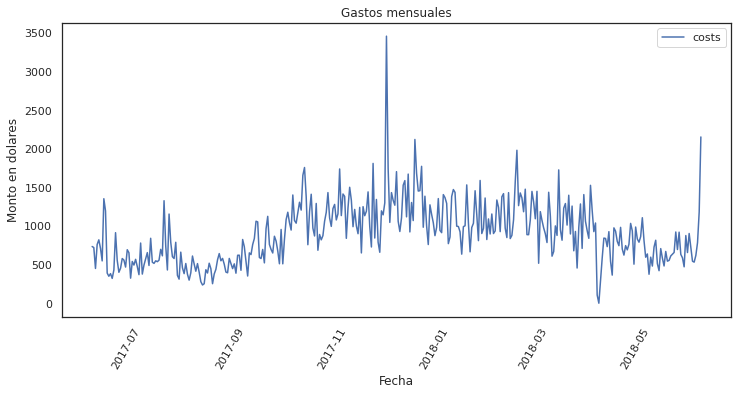

In [186]:
costs_by_month = costs.groupby('dt').agg({'costs':'sum'})
costs_by_month.plot(figsize=(12,6))
plt.xlabel('Fecha')
plt.xticks(rotation=60)
plt.ylabel('Monto en dolares')
plt.title('Gastos mensuales')
plt.show(block=False)

Como se puede apreciar, el costo promedio mensual es del orden de los 130 dolares. El máximo que se gasto corresponde al mes de diciembre (1.788 dolares), mientras que el mínimo fue en abril dónde se gastaron solo 0.54 dolares.

In [187]:
print('En el año se gastó en total:' , costs['costs'].sum())
print()
print('El promedio de gastos mensuales es de:' , costs['costs'].mean())

En el año se gastó en total: 329131.62

El promedio de gastos mensuales es de: 129.47742722265932


Analizemos entonces el costo por fuente:

In [188]:
costs_per_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
costs_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


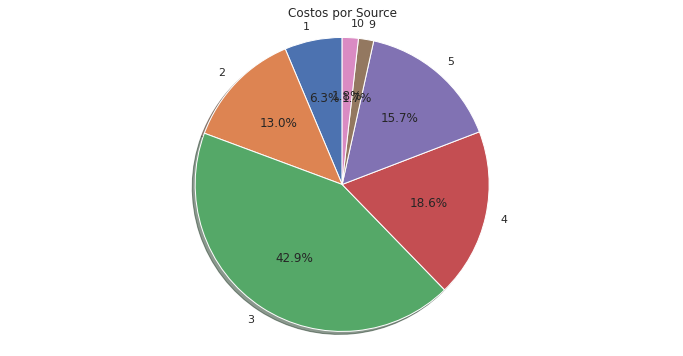

In [189]:
labels = costs_per_source['source_id']
sizes = costs_per_source['costs']

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Costos por Source')
plt.show()

Notamos que el gasto anual fue de 329.131,62, y que en promedio mensualmente se gasta 129,48. Cuando revisamos los costes por fuente, encontramos que la fuente que más gasta es la número 3 (42.9% de los gastos), seguida por la número 4 (18.6%), la 5 (15.7%) y la 2 (13%), el resto de las fuentes están por debajo del 10% cada una. Analizemos el comportamiento de los costos mensuales por fuente:

In [190]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [191]:
costs_by_source = costs.pivot_table(
    index='month', columns='source_id', values='costs', aggfunc='sum'
)

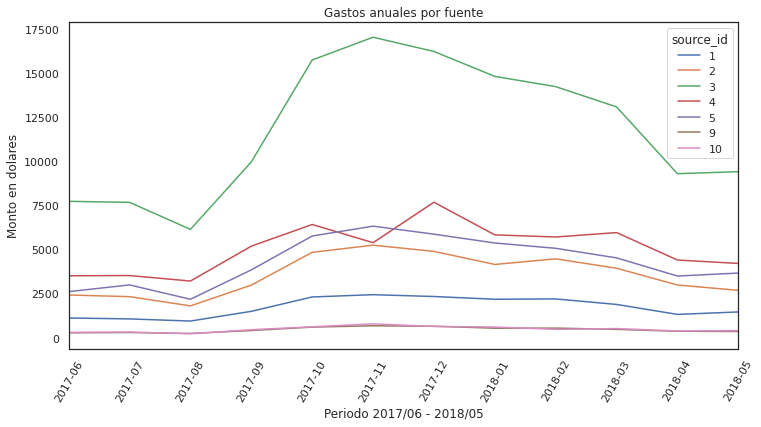

In [192]:
ax = costs_by_source.plot(xticks=costs_by_source.index.strftime('%Y-%m'), ylabel='source_id', figsize=(12,6))
ax.set_xticks(costs_by_source.index)
ax.set_xticklabels(costs_by_source.index.strftime('%Y-%m'))
plt.xlabel('Periodo 2017/06 - 2018/05')
plt.xticks(rotation=60)
plt.ylabel('Monto en dolares')
plt.title('Gastos anuales por fuente')
plt.show(block=False)

En el año se gastó en total 329.131,62 dolares. El costo promedio mensual es del orden de los 130 dolares. El máximo que se gasto corresponde al mes de diciembre (1.788 dolares), mientras que el mínimo fue en abril dónde se gastaron solo 0.54 dolares. Al revisar los gastos por fuente, encontramos que la fuente que más gasta es la número 3 (42.9% de los gastos), seguida por la número 4 (18.6%), la 5 (15.7%) y la 2 (13%), el resto de las fuentes están por debajo del 10% cada una.


Además, notamos que a partir de agosto todas las fuentes aumentaron sus costos, pero la que aumentó más drásticamente fue la número 3. En noviembre, notamos que la fuente número cuatro baja los costos, mientras que el resto los aumenta y en diciembre, cuando todas las fuentes empiezan a decrecer, la número cuatro los aumenta. Todas las fuentes bajan sus costos a partir de marzo.

#### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes? <a id='marketing_02'></a>

Para saber cuan rentable fueron estas inversiones calcularemos primero el CAC general (costo de adquisición de clientes), seguido del CAC por fuente, para finalmente calcular el ROMI (retorno de la inversión en marketing). Lo primero que haremos es reducir la tabla a solo lo esencial:

In [193]:
costs_ = costs[['dt', 'costs']]
costs_['dt'] = costs_['dt'].astype('datetime64[M]')
costs_.head()

/tmp/ipykernel_26/1436523839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costs_['dt'] = costs_['dt'].astype('datetime64[M]')


,dt,costs
0,2017-06-01,75.20
1,2017-06-01,62.25
2,2017-06-01,36.53
3,2017-06-01,55.00
4,2017-06-01,57.08


Agruparemos los costos por mes:

In [194]:
monthly_costs = costs_.groupby('dt').sum()
monthly_costs.head()

,costs
dt,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


Ahora ya podemos agregar estos datos a nuestra tabla de reporte:

In [195]:
report_ = pd.merge(report, monthly_costs, left_on ='first_order_month', right_on='dt')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,orders_month,revenue,gp,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.0,8.905091


In [196]:
cac_table = report_.pivot_table(
    index='orders_month', values='cac', aggfunc='mean'
)
cac_table

,cac
orders_month,
2017-06-01,8.905091
2017-07-01,9.195289
2017-08-01,9.728864
2017-09-01,9.657062
2017-10-01,9.399515
2017-11-01,9.381074
2017-12-01,9.289750
2018-01-01,9.370694
2018-02-01,9.325368


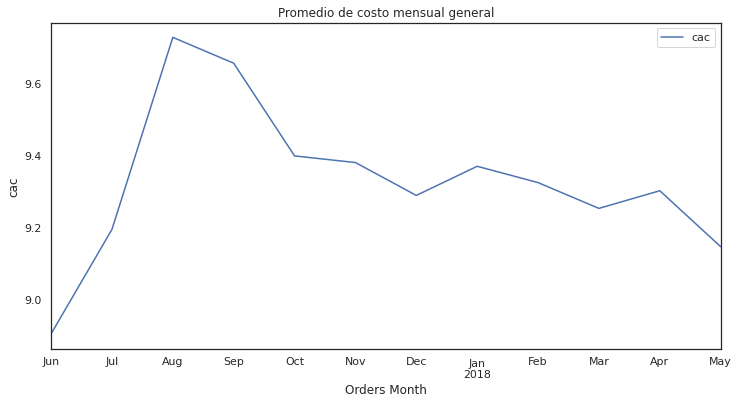

In [197]:
cac_table.plot(figsize=(12,6))
plt.xlabel('Orders Month')

plt.ylabel('cac')
plt.title('Promedio de costo mensual general')
plt.show(block=False)

Podemos notar que entre julio y agosto los costos subieron exponencialmente, pero casi de inmediato comenzaron a bajar. Vamos a analizar los gastos por fuente.

#### Cac per Source:

Para obtener el CAC por fuente, lo primero que tenemos que hacer es buscar el ingreso por fuente. Para conseguir el LTV por fuente vamos a buscar las fuentes de cada purchase. Crearemos para ello una fórmula para obtener la fuente entre dos fechas:

In [198]:
buyers = pd.merge(first_activity_date, first_orders, on='uid')
buyers

,uid,first_activity_date,first_order_month
0,313578113262317,2017-09-18 22:49:00,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01
...,...,...,...
36517,18445147675727495770,2017-08-20 13:30:00,2017-11-01
36518,18445407535914413204,2017-09-22 23:48:00,2017-09-01
36519,18445601152732270159,2017-08-07 11:51:00,2018-03-01
36520,18446156210226471712,2017-11-07 10:01:00,2018-02-01


Ahora buscaremos la primera vez que accedieron al sitio, para encontrar la fuente utilizada:

In [199]:
visits = visits.sort_values(by='start_ts')
visits_sources = visits.groupby('uid').first()
visits_sources = visits_sources[['source_id']]

Vamos a unir las dos tablas:

In [200]:
buyers_ = pd.merge(buyers, visits_sources, left_on='uid', right_index=True)
buyers_

,uid,first_activity_date,first_order_month,source_id
0,313578113262317,2017-09-18 22:49:00,2018-01-01,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,5
...,...,...,...,...
36517,18445147675727495770,2017-08-20 13:30:00,2017-11-01,5
36518,18445407535914413204,2017-09-22 23:48:00,2017-09-01,3
36519,18445601152732270159,2017-08-07 11:51:00,2018-03-01,2
36520,18446156210226471712,2017-11-07 10:01:00,2018-02-01,3


A esta, tabla le agregaremos el mes del pedido y el ingreso:

In [201]:
revenue_user_month = orders.groupby(['uid', 'orders_month']).agg({'revenue':'sum'}).reset_index()
buyers_ = buyers_.merge(revenue_user_month, on = 'uid')
buyers_

,uid,first_activity_date,first_order_month,source_id,orders_month,revenue
0,313578113262317,2017-09-18 22:49:00,2018-01-01,2,2018-01-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,10,2017-06-01,3.05
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,3,2017-10-01,73.33
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,5,2018-01-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,5,2017-11-01,10.99
...,...,...,...,...,...,...
41013,18445147675727495770,2017-08-20 13:30:00,2017-11-01,5,2017-11-01,3.05
41014,18445407535914413204,2017-09-22 23:48:00,2017-09-01,3,2017-09-01,0.88
41015,18445601152732270159,2017-08-07 11:51:00,2018-03-01,2,2018-03-01,4.22
41016,18446156210226471712,2017-11-07 10:01:00,2018-02-01,3,2018-02-01,9.78


La tabla buyers_ nos servira para todos los cálculos posteriores. Ahora nos concetraremos en el CAC por fuente:

In [202]:
cac_sources =  buyers_.groupby(['source_id', 'orders_month']).agg({'uid':'count'}).reset_index()
cac_sources.columns = ['source_id', 'orders_month', 'n_users']
monthly_costs_cac_source = costs.groupby(['source_id', 'month']).agg({'costs':'sum'}).reset_index()
cac_sources = cac_sources.merge(monthly_costs_cac_source, left_on=['source_id', 'orders_month'], right_on=['source_id', 'month'])
cac_sources['cac'] = cac_sources['costs'] / cac_sources['n_users']
cac_pivot = cac_sources.pivot_table(
    index='month', columns='source_id', values='cac', aggfunc='sum'
)
cac_pivot = cac_pivot.reset_index()
cac_pivot['7'] = 0

In [199]:
cac_pivot.head()

source_id,month,1,2,3,4,5,9,10,7
0,2017-06-01,5.924263,10.329277,12.118574,8.510412,6.812813,4.194412,3.307579,0
1,2017-07-01,6.095909,10.801435,14.617848,6.736126,6.860732,5.708302,6.223019,0
2,2017-08-01,7.436016,13.029137,16.694402,9.088588,5.842995,3.607681,5.963333,0
3,2017-09-01,5.890235,11.847857,12.195288,8.415332,6.228382,4.035146,5.234886,0
4,2017-10-01,6.158910,10.509761,12.732395,5.207494,5.802213,3.808813,2.917395,0


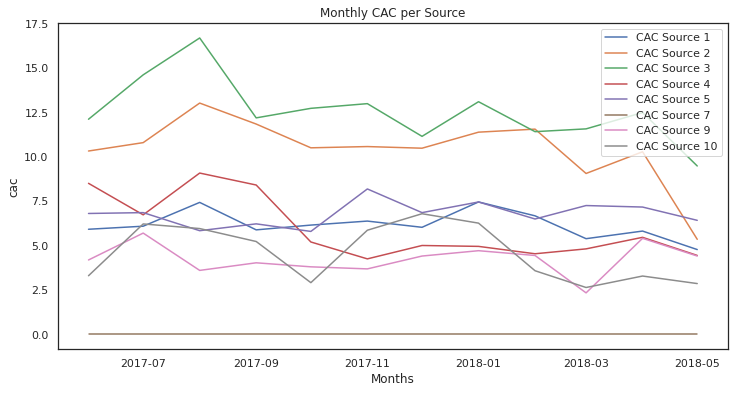

In [200]:
plt.figure(figsize=(12,6))
plt.plot(cac_pivot['month'], cac_pivot[1], label = "CAC Source 1")
plt.plot(cac_pivot['month'], cac_pivot[2], label = "CAC Source 2")
plt.plot(cac_pivot['month'], cac_pivot[3], label = "CAC Source 3")
plt.plot(cac_pivot['month'], cac_pivot[4], label = "CAC Source 4")
plt.plot(cac_pivot['month'], cac_pivot[5], label = "CAC Source 5")
plt.plot(cac_pivot['month'], cac_pivot['7'], label = "CAC Source 7")
plt.plot(cac_pivot['month'], cac_pivot[9], label = "CAC Source 9")
plt.plot(cac_pivot['month'], cac_pivot[10], label = "CAC Source 10")
plt.xlabel('Months')
plt.ylabel('cac')
plt.title('Monthly CAC per Source')
plt.legend()
plt.show(block=False)

Como se puede apreciar el costo de adquisicón de clientes de la fuente 3 partió por encima de los 12 dolares y fue creciendo como hasta septiembre, pero luego fue decreciendo gradualmente aunque se mantuvo por encima de los 10 dolares. El cac de las fuentes 1 se mantuvo bastante parejo a lo largo del año. El cac de la fuente 2 es el segundo más alto en promedio y solo comenzó a bajar en marzo 2018. La mayoría de las fuentes se mantuvo entre los 2.5 dolares y los 8 dolares a lo largo del año. La fuente número siete no tuvo costos de adquisicón de clientes ya que no se invirtió en esta fuente, cabe decir que por la mismo solo entró un cliente en el año. 

#### ¿Cuán rentables eran las inversiones? <a id='marketing_03'></a>

Revisemos pues el ROMI (retorno de la inversión en marketing) general y luego por fuente:

In [201]:
report_['romi'] = report_['ltv'] / report_['cac']
romi_table = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)
romi_table.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


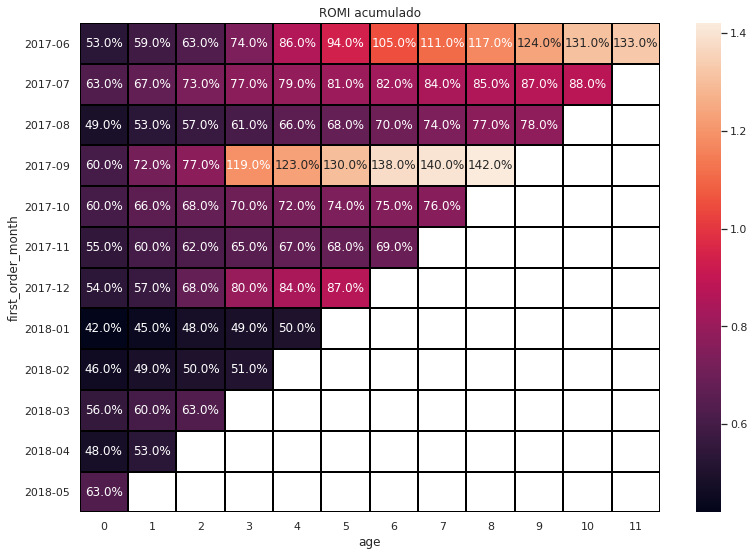

In [202]:
romi_heat = romi_table.cumsum(axis=1).round(2)
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('ROMI acumulado')
sns.heatmap(
    romi_heat, annot=True, fmt='.1%', linewidths=1, linecolor='black', yticklabels=romi_heat.index.strftime('%Y-%m')
)
plt.show(block=False)

Podemos notar que en la cohorte de junio 2017, a partir de junio (el 6to mes) se comenzaron a percibir ganancias. En el caso de la cohorte de septiembre, fue a partir de abril (4to mes) que se empezaron a percibir ganancias. Analizemos las cohortes promedio:

In [203]:
romi_table.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

Notamos que en promedio, se comienza a generar ganancias a partir del 11 mes.

#### ROMI per Source:

Revisemos el ROMI por fuente (no podremos obtener el de la fuente 7, ya que sería una división por cero):

In [204]:
buyers_.head()

,uid,first_activity_date,first_order_month,source_id,orders_month,revenue
0,313578113262317,2017-09-18 22:49:00,2018-01-01,2,2018-01-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,10,2017-06-01,3.05
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,3,2017-10-01,73.33
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,5,2018-01-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,5,2017-11-01,10.99


In [206]:
romi_totals = buyers_.groupby(['source_id', 'orders_month']).agg({'uid':'count', 'revenue':'sum'}).reset_index()
romi_totals.columns = ['source_id', 'orders_month', 'n_users', 'total_revenue']
romi_totals = romi_totals.merge(monthly_costs_cac_source, left_on=['source_id', 'orders_month'], right_on=['source_id', 'month'])
romi_totals['ltv'] = romi_totals['total_revenue'] / romi_totals['n_users']
romi_totals['cac'] = romi_totals['costs'] / romi_totals['n_users']
romi_totals['romi'] = romi_totals['ltv'] / romi_totals['cac']
romi_totals_pivot = romi_totals.pivot_table(
    index='month', columns='source_id', values='romi', aggfunc='mean'
)
romi_totals_pivot = romi_totals_pivot.reset_index()
romi_totals_pivot['7'] = 0

In [207]:
romi_totals_pivot

source_id,month,1,2,3,4,5,9,10,7
0,2017-06-01,1.224847,0.429962,0.362709,0.557596,0.725842,0.850887,0.729903,0
1,2017-07-01,1.474238,0.801038,0.416684,0.816859,0.861514,0.784260,0.568765,0
2,2017-08-01,1.514472,0.512973,0.319843,0.563530,0.972754,1.192183,0.801866,0
3,2017-09-01,2.045000,0.807252,0.467591,0.597175,1.155585,1.106467,0.426075,0
4,2017-10-01,1.563994,1.097377,0.389213,0.935110,0.960141,1.328367,0.913080,0
5,2017-11-01,1.439366,0.879074,0.380082,1.325780,0.628809,1.066205,0.777538,0
6,2017-12-01,1.173915,0.951878,0.372736,0.979920,2.453589,0.987887,0.538058,0
7,2018-01-01,1.168623,0.715139,0.318461,0.775584,0.737562,0.699521,0.495695,0
8,2018-02-01,1.066505,1.467367,0.350644,0.993732,0.998121,1.049048,0.703502,0
9,2018-03-01,2.048909,2.006520,0.395800,1.137526,0.822912,1.410939,1.290838,0


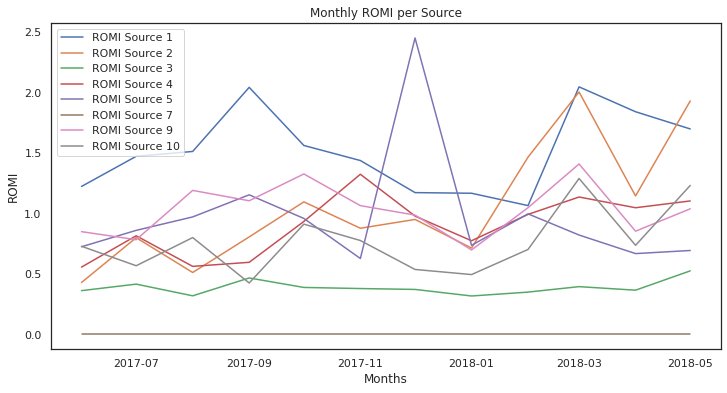

In [208]:
plt.figure(figsize=(12,6))
plt.plot(romi_totals_pivot['month'], romi_totals_pivot[1], label = "ROMI Source 1")
plt.plot(romi_totals_pivot['month'], romi_totals_pivot[2], label = "ROMI Source 2")
plt.plot(romi_totals_pivot['month'], romi_totals_pivot[3], label = "ROMI Source 3")
plt.plot(romi_totals_pivot['month'], romi_totals_pivot[4], label = "ROMI Source 4")
plt.plot(romi_totals_pivot['month'], romi_totals_pivot[5], label = "ROMI Source 5")
plt.plot(romi_totals_pivot['month'], romi_totals_pivot['7'], label = "ROMI Source 7")
plt.plot(romi_totals_pivot['month'], romi_totals_pivot[9], label = "ROMI Source 9")
plt.plot(romi_totals_pivot['month'], romi_totals_pivot[10], label = "ROMI Source 10")
plt.xlabel('Months')
plt.ylabel('ROMI')
plt.title('Monthly ROMI per Source')
plt.legend()
plt.show(block=False)

Como se puede apreciar, la fuente 1 en general tiene un mayor retorno de inversión, tuvo unos picos en septiembre y marzo, pero bajó fuerte en febrero. Es la mejor fuente. La fuente número 5 tuvo el retorno de inversión más grande de todas, esto fue en diciembre, sin embargo el resto de los meses su retorno fue mucho más bajo. La fuente número 2, partió lento pero es la única que fue constantemente aumentando su retorno. En conclusión creo que valdría la pena analizar la fuente 1 y la 2 que fueron las mejores. Haremos un heatmap por fuente para analizarlas a fondo.

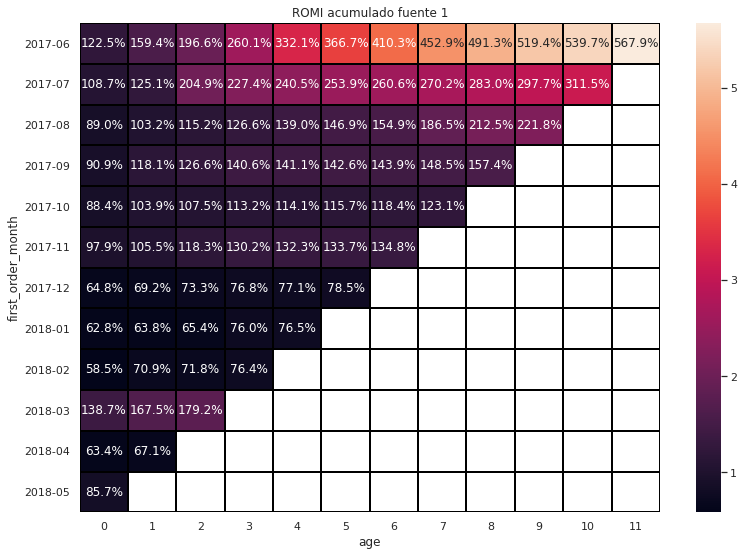

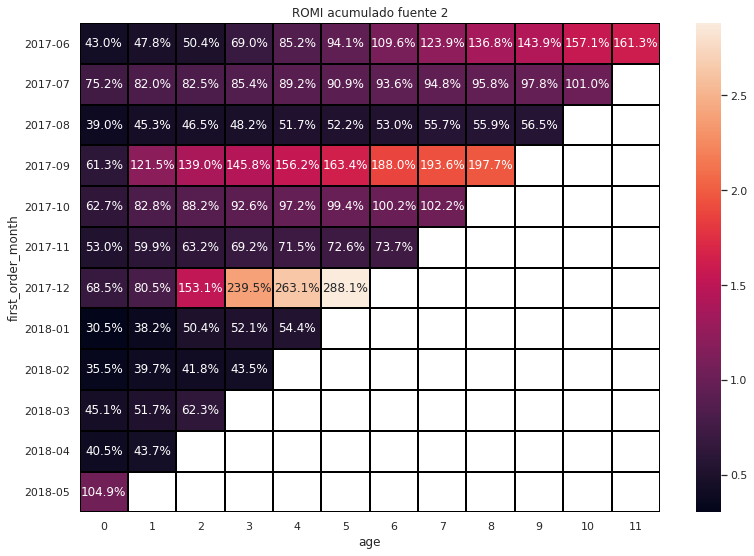

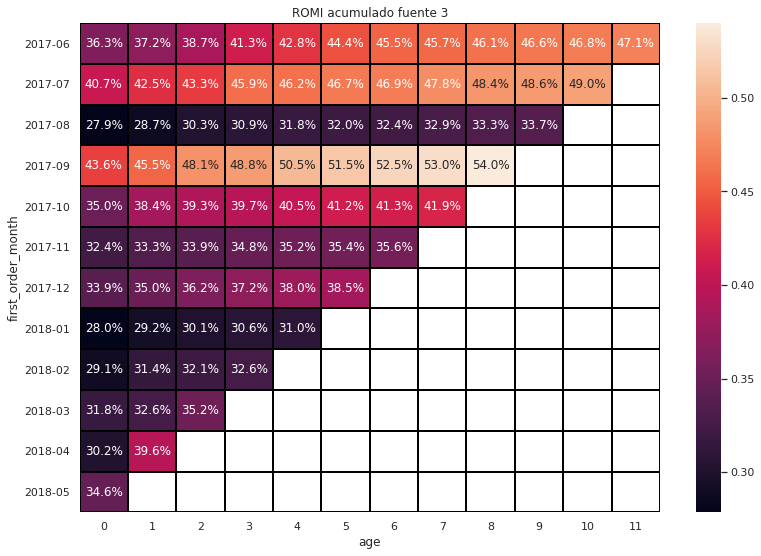

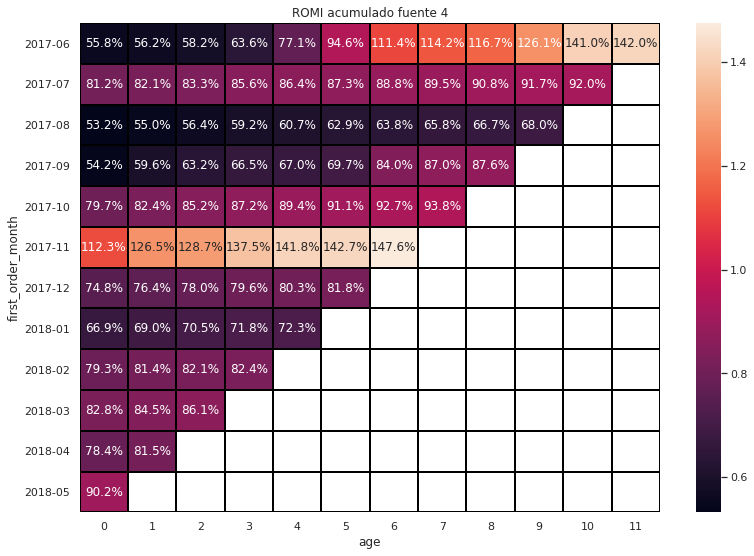

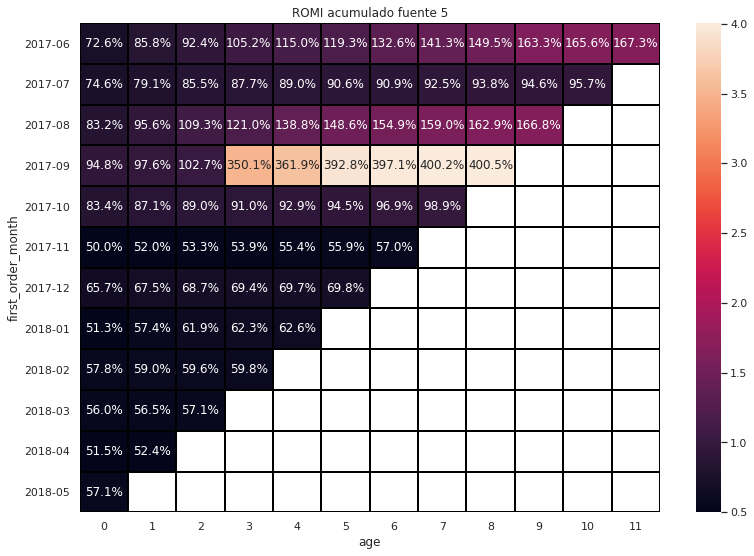

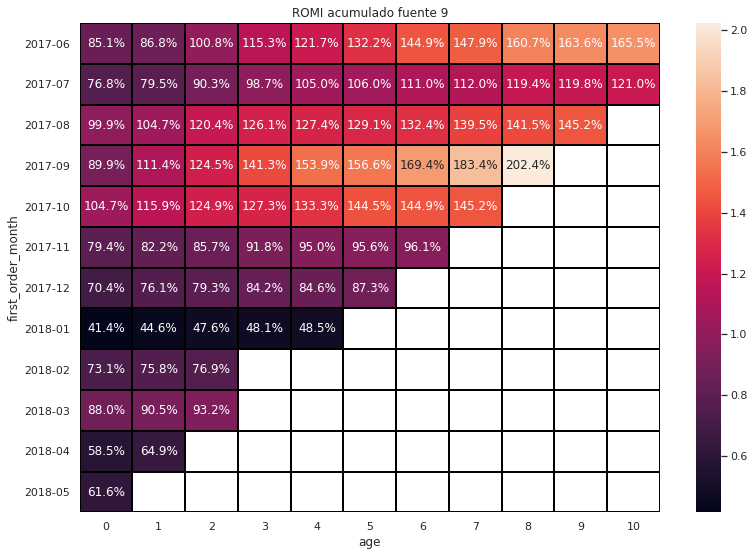

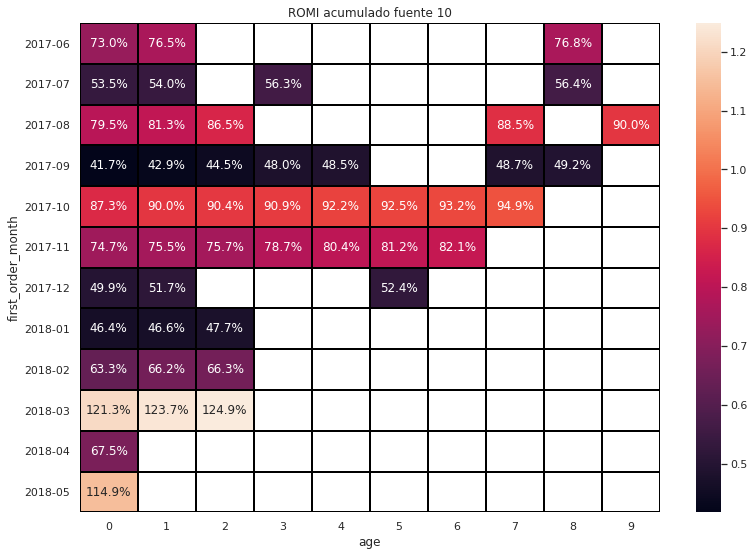

In [209]:
for source, df in buyers_.groupby('source_id'):
    if source != 7:
        cohort_size = df.groupby(['source_id', 'first_order_month']).agg({'uid':'nunique'}).reset_index()
        cohort_size.columns = ['source_id', 'first_order_month', 'n_buyers']
        cohort_revenue = df.groupby(['source_id', 'first_order_month', 'orders_month']).agg({'revenue':'sum'}).reset_index()
        cohort_revenue.columns = ['source_id', 'first_order_month', 'orders_month', 'gp']
        result = pd.merge(cohort_size, cohort_revenue, on=['source_id', 'first_order_month'])
        result['age'] = ((result['orders_month'] - result['first_order_month']) / np.timedelta64(1,'M')).round().astype(int)
        result['ltv'] = result['gp'] / result['n_buyers']
        monthly_costs_source = costs.groupby(['source_id', 'month']).agg({'costs':'sum'}).reset_index()
        result = result.merge(monthly_costs_source, left_on=['source_id', 'first_order_month'], right_on=['source_id', 'month'])
        result = result.drop(columns='month')
        result['cac'] = result['costs'] / result['n_buyers']
        result['romi'] = result['ltv'] / result['cac']
        romi = result.pivot_table(
            index='first_order_month', columns='age', values='romi',aggfunc='mean'
        ).cumsum(axis=1)
        sns.set(style='white')
        plt.figure(figsize=(13,9))
        plt.title(f'ROMI acumulado fuente {source}')
        sns.heatmap(
            romi, annot=True, fmt='.1%', linewidths=1, linecolor='black', yticklabels=romi_heat.index.strftime('%Y-%m')
        )
        plt.show(block=False)

Notamos que la fuente uno en general tiene valores muy altos de retorno, en particular en la primera cohorte a partir del quinto mes. La fuente número 2 también tiene retornos altos, notamos unos bajones en la cohorte de agosto, tiene muy buenos resultados en las cohortes de junio, julio, septiembre, octubre y diciembre.

Por otro lado, recordemos que la fuente 3 es la que más gastos hacia, y podemos notar que ninguna de sus cohortes supera el 100%. La fuente 4 es un poco irregular, tiene la cohorte de junio que a partir de junio trajo ganancias, pero luego cohortes como agosto y septiembre que fueron bastante bajas, la cohorte de noviembre en cambio fue muy buena. La fuente 5, en general tuvo pocas ganancias, pero tuvo un pico grande en la cohorte de septiembre a partir del cuarto mes con números muy altos. La fuente 9 tiene muy buenos números en las cohortes de junio a octubre, pero de noviembre en adelante los números bajaron bastante. Por último la decima fuente tiene un comportamiento muy irregular con números además que no superan el 100%.

## Conclusión General:<a id='conclusion'></a>

Recibimos los datos de visitas, pedidos y gastos de **Y.Afisha**. Obtimizamos y cargamos los datos en tres tablas *visits*, *orders* y *costs*. Las tablas no tenian valores ausentes y solo se corrigieron los nombres de las columnas para que estuviesen en minusculas y sin espacios. 

La tabla *visits* consta de 5 columnas y 359400 líneas. La tabla *orders* consta de 3 columnas y 50415 líneas y la tabla *costs* consta de 3 columnas y 2542 líneas.

**Producto:**

En esta sección hemos encontrado que en promedio tenemos 907 usuarios diarios. Valdría la pena revisar los días 24 de noviembre 2017 y el 31 de marzo 2018 ya que fueron los picos con mayor número de usuarios conectados y menor númnero de usuarios conectados respectivamente. Estos dos días fueron muy irregulares con respecto al resto.

El promedio semanal de usuarios es de 5.621, pudimos notar además que la conectividad de los usuarios comienza a aumentar en agosto, y se regularizan por un par de meses hasta experimentar el mayor pic en la tercera semana de noviembre. Pero para la última semana de diciembre se experimentó una caida grande. Las visitas se vuelven a regularizar, y encontramos un pic más pequeño el primero de marzo seguido de una caída similar a la de diciembre.

Al mes tenemos 23.228 usuarios utilizando el producto. En la gráfica de usuarios conectados mensualmente, notamos que a partir de agosto 2017 el número de usuarios conectados sube exponencialmente, A finales de octubre, inicios de noviembre llega a su pic y luego los números comienzan a decrecer gradualmente. En Marzo se experimentó una caída grande para llegar a abril con números bajos.

El promedio de sesiones diarias es 987, lo que equivale a 1.08 sesiones por usuario al día. Podemos notar que el promedio de duración es de 644 segundos, la mediana de 300 segundos, pero al analizar el gráfico y ver la moda, notámos que en realidad, lo normal son solo 60 segundos.

Por otro lado, encontramos que el factor de adherencia semanal es de 16% y el mensual es de 3%. Pero al revisar nuestro mapa de calor, notamos que en junio 2017 tuvimos una retención bastante buena. En la segunda y tercera cohorte hubo un bajón, pero remontó en la cuarta y quinta. Luego comenzó a decender progresivamente. Las siguientes cohortes fueron perdiendo retención progresivamente.En julio 2017 se perdieron más de la mitad de los clientes en el quinto mes, agosto en el cuarto, septiembre en el tercero.


**Ventas:**

Como se puede apreciar la mayoría de los usuarios (el 82% de los usuarios) realizan su compra en el mismo mes en el que ingresaron por primera vez a la plataforma. En este caso será interesante revisar que pasa en ese primer mes en el que acceden los usuarios.

Comprobamos que los usuarios realizan la comprar en su mayoria (79%) la primera vez que acceden a la plataforma, y en general no pasan más de 4 días para que los indecisos realizen su compra. Esto es el sueño de una companía. Revisemos cuantos pedidos realizan estos usuarios.

Como se puede apreciar en el gráfico los primeros 3 meses (de junio a agosto) las ordenes mensuales no superaban los 2500. A partir de septiembre comenzaron a aumentar el número de ordenes hasta llegar al pic en diciembre. Sin embargo, las ordenes comenzaron a bajar en 2018 teniendo una caída grande en abril.

El promedio de gastos por mes varia entre los 4 y justo por debajo de los 6 dolares. El pic es en diciembre, pero hay una caída grande en enero 2018.


Los clientes en general hacen un gasto del orden de los 4.9 dolares la primera vez que acceden a la página. En julio 2017 partieron mucho mejor con 6.01 dolares. Sin embargo, en los meses siguientes el gasto promedio baja drásticamente, en general por debajo de 1 dolar. El mejor mes, fue septiembre 2017 que sobrepasó el dolar en el primer mes y en el tercer mes llegó casi a los 4 dolares.


**Marketing:**

En el año se gastó en total 329.131,62 dolares. El costo promedio mensual es del orden de los 130 dolares. El máximo que se gasto corresponde al mes de diciembre (1.788 dolares), mientras que el mínimo fue en abril dónde se gastaron solo 0.54 dolares. Cuando revisamos los costes por fuente, encontramos que la fuente que más gasta es la número 3 (42.9% de los gastos), seguida por la número 4 (18.6%), la 5 (15.7%) y la 2 (13%), el resto de las fuentes están por debajo del 10% cada una.

En el año se gastó en total 329.131,62 dolares. El costo promedio mensual es del orden de los 130 dolares. El máximo que se gasto corresponde al mes de diciembre (1.788 dolares), mientras que el mínimo fue en abril dónde se gastaron solo 0.54 dolares. Al revisar los gastos por fuente, encontramos que la fuente que más gasta es la número 3 (42.9% de los gastos), seguida por la número 4 (18.6%), la 5 (15.7%) y la 2 (13%), el resto de las fuentes están por debajo del 10% cada una.

Además, notamos que a partir de agosto todas las fuentes aumentaron sus costos, pero la que aumentó más drásticamente fue la número 3. En noviembre, notamos que la fuente número cuatro baja los costos, mientras que el resto los aumenta y en diciembre, cuando todas las fuentes empiezan a decrecer, la número cuatro los aumenta. Todas las fuentes bajan sus costos a partir de marzo.

Revisamos los costos de adquisición y encontramos lo siguiente. El costo de adquisicón de clientes de la fuente 3 partió por encima de los 12 dolares y fue creciendo como hasta septiembre, pero luego fue decreciendo gradualmente aunque se mantuvo por encima de los 10 dolares. El cac de las fuentes 1 se mantuvo bastante parejo a lo largo del año. El cac de la fuente 2 es el segundo más alto en promedio y solo comenzó a bajar en marzo 2018. La mayoría de las fuentes se mantuvo entre los 2.5 dolares y los 8 dolares a lo largo del año. La fuente número siete no tuvo costos de adquisicón de clientes ya que no se invirtió en esta fuente, cabe decir que por la mismo solo entró un cliente en el año.

Con respecto al retorno de inversión, la fuente 1 en general tiene un mayor retorno de inversión, tuvo unos picos en septiembre y marzo, pero bajó fuerte en febrero. Es la mejor fuente. La fuente número 5 tuvo el retorno de inversión más grande de todas, esto fue en diciembre, sin embargo el resto de los meses su retorno fue mucho más bajo. La fuente número 2, partió lento pero es la única que fue constantemente aumentando su retorno. En conclusión creo que valdría la pena analizar la fuente 1 y la 2 que fueron las mejores. Haremos un heatmap por fuente para analizarlas a fondo.

Notamos que la fuente uno en general tiene valores muy altos de retorno, en particular en la primera cohorte a partir del quinto mes. La fuente número 2 también tiene retornos altos, notamos unos bajones en la cohorte de agosto, tiene muy buenos resultados en las cohortes de junio, julio, septiembre, octubre y diciembre.

Por otro lado, recordemos que la fuente 3 es la que más gastos hacia, y podemos notar que ninguna de sus cohortes supera el 100%. La fuente 4 es un poco irregular, tiene la cohorte de junio que a partir de junio trajo ganancias, pero luego cohortes como agosto y septiembre que fueron bastante bajas, la cohorte de noviembre en cambio fue muy buena. La fuente 5, en general tuvo pocas ganancias, pero tuvo un pico grande en la cohorte de septiembre a partir del cuarto mes con números muy altos. La fuente 9 tiene muy buenos números en las cohortes de junio a octubre, pero de noviembre en adelante los números bajaron bastante. Por último la decima fuente tiene un comportamiento muy irregular con números además que no superan el 100%.


**Recomendaciones:**

A partir de lo estudiado, creemos que es importante trabajar en la retención de los clientes. Creemos que las fuentes 1 y 2. Seria bueno investigar que pasó a partir de noviembre con la fuente 9 ya que los números buenos bajaron considerablemente. Y recomendaría dejar de utilizar la fuente 3 y la fuente 10. Valdría la pena revisar con el equipo de marketing las estrategias de septiembre, porque claramente ese fue el mejor cohorte.